In [1]:
#standartiniai moduliai
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns



In [2]:
dus18 = pd.read_csv('NewData/DUS2018.csv')
dus18 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']]
dus18.head(3)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487
2,M,40-49,G2,1500


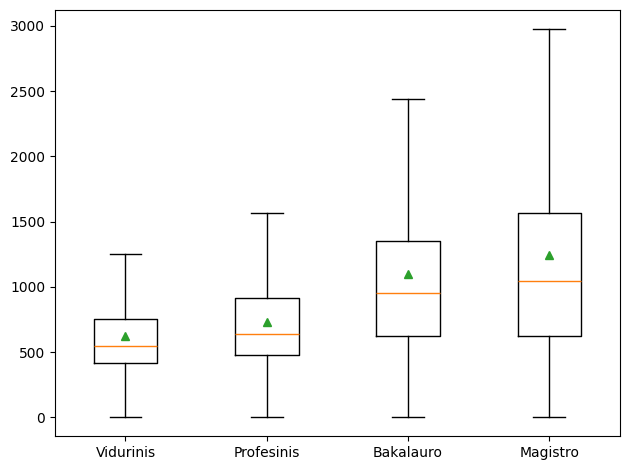

In [3]:
# boxplot()

atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values

atl = [atl_g1,atl_g2,atl_g3,atl_g4]
edus = ['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistro']
fig, axis = plt.subplots()
#plotting code:
axis.boxplot(atl, showmeans=True, showfliers=False)

axis.set_xticklabels(edus)

# axis.grid() # uzdeda grida
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

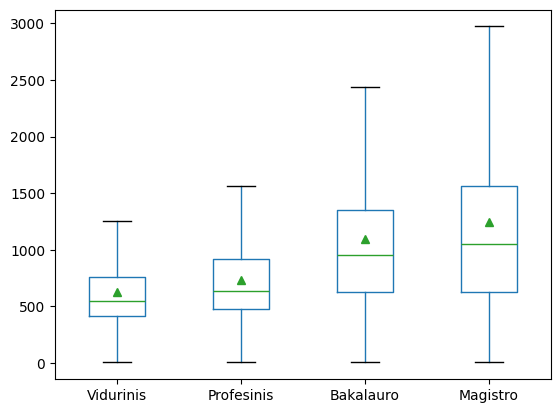

In [4]:
# II boxplot():
axis = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False)
axis.grid(visible=False) # isjungia grid'a
axis.set_xticklabels(edus)

plt.show()

[Text(1, 0, 'Vidurinis'),
 Text(2, 0, 'Profesinis'),
 Text(3, 0, 'Bakalauro'),
 Text(4, 0, 'Magistro')]

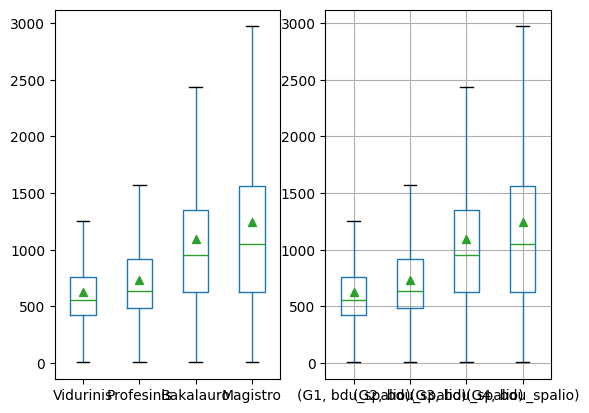

In [5]:
# II boxplot():

fig, (left, right) = plt.subplots(1,2)

dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=left)
dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=right)
left.grid(visible=False)
left.set_xticklabels(edus)


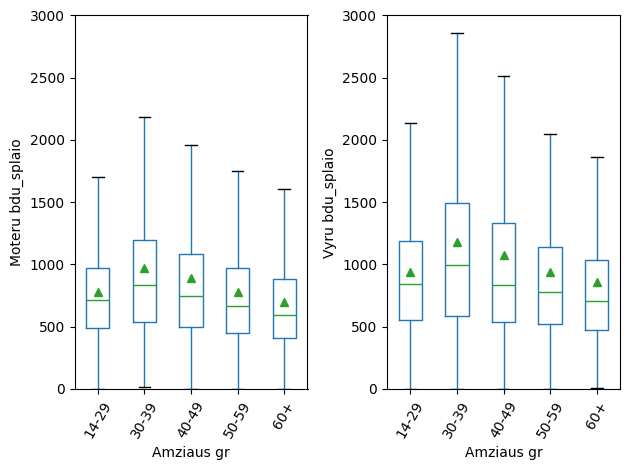

In [6]:
# # sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes. su subplots() 
# sukurkite 2 grafikus, kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. Prisiminkite ir sudėkite ašių pavadinimus

# dus18_M = dus18.query('lytis == "M"')['bdu_spalio'].values
# dus18_F = dus18.query('lytis == "F"')['bdu_spalio'].values

am = ['14-29','30-39','40-49','50-59','60+']

fig, (left, right) = plt.subplots(1,2)
dus18.query('lytis == "F"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=left )
dus18.query('lytis == "M"').groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True,
                                       showfliers=False, ax=right )
left.grid(visible=False)
left.set_xticklabels(am)
left.set_xticklabels(am,rotation=60)
left.set_ylim(0,3000)
left.set_ylabel('Moteru bdu_splaio')
left.set_xlabel('Amziaus gr')

right.grid(visible=False)
right.set_xticklabels(am)
right.set_ylim(0,3000)
right.set_xticklabels(am,rotation=60)
right.set_ylabel('Vyru bdu_splaio')
right.set_xlabel('Amziaus gr')

fig.tight_layout() 

In [7]:
dus18.head(2)

,lytis,amzius,issilavinimas,bdu_spalio
0,F,40-49,G2,460
1,M,50-59,G2,1487


In [8]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='default')

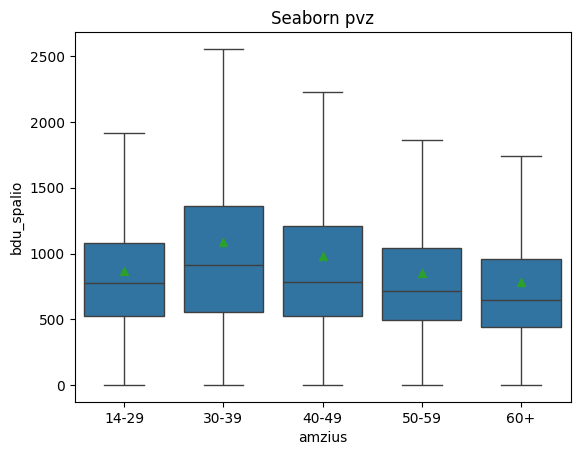

In [9]:
ax = sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio', showmeans=True, showfliers=False)
ax.set_title('Seaborn pvz')
plt.show()


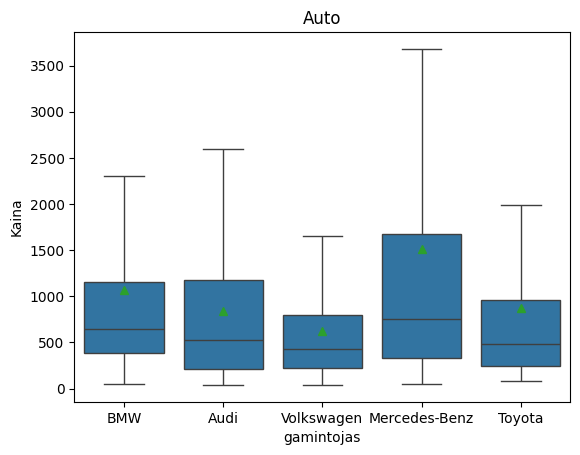

In [55]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite

auto = pd.read_csv('NewData/auto.csv', sep='|')

def converter(sk):
    skaicius = float(sk[0:-1].replace(' ','').replace('k','').replace('Nenurodyt','0'))
    return skaicius

auto['Kaina'] = auto['price'].apply(converter) # susikonvertuojam i skaicius
autoVid_data = auto.groupby(by='gamintojas')['modelis'].count().sort_values()
autoVid_data.tail().reset_index()

# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.
gamint = autoVid_data.tail().index # susirandam lenteles reiksmes 

# auto.query('gamint in @gamint')

autoTable = sns.boxplot(data=auto.query('gamintojas in @gamint'), x='gamintojas', y='Kaina', showmeans=True, showfliers=False)
autoTable.set_title('Auto')
plt.show()


<Axes: xlabel='gamintojas', ylabel='kaina'>

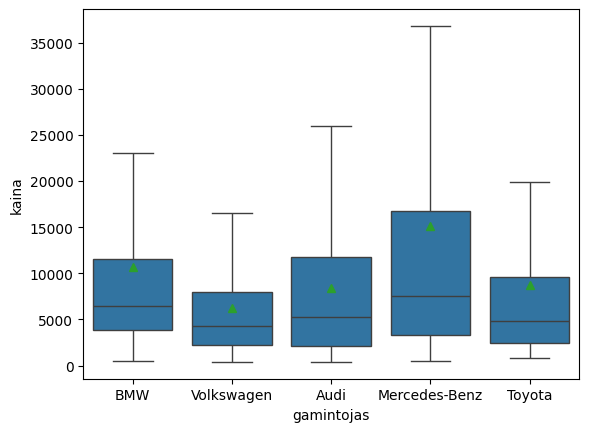

In [11]:
#Paulius pvz

auto['kaina'] = auto['price'].apply(lambda x: float(x.replace(' ', ''))) # paverciam kainas
auto_atrinkta = auto.merge(auto.value_counts('gamintojas').head(), left_on = 'gamintojas', right_on = 'gamintojas', how = 'right') # sumerginam
sns.boxplot(data=auto_atrinkta, x = 'gamintojas', y = 'kaina', showfliers = False, showmeans = True) #braizom

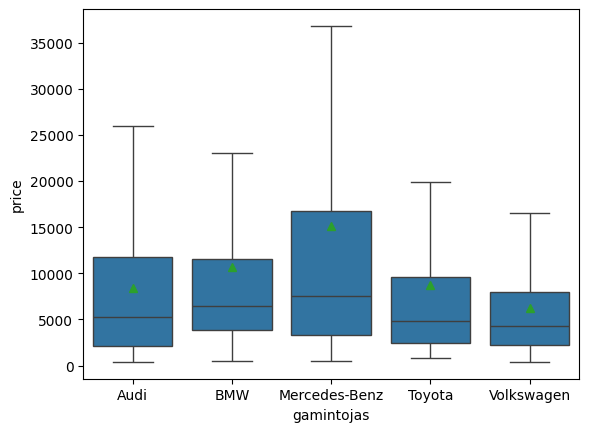

In [12]:
# Dest pvz
auto = pd.read_csv('NewData/auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [13]:
# https://www.geeksforgeeks.org/top-10-string-methods-in-pandas/ str funk

auto['G'] = auto['gamintojas'].str.upper().str[:3]
auto.head()

,gamintojas,price,modelis,rida,G
0,BMW,19500.0,M5,253 000 km,BMW
1,Mitsubishi,2700.0,Outlander,195 405 km,MIT
2,Seat,13490.0,Arona,129 800 km,SEA
3,Skoda,14650.0,Octavia Scout,183 000 km,SKO
4,Volvo,38000.0,XC90,127 896 km,VOL


In [14]:
import requests as rq

In [15]:
url = "https://api.meteo.lt/v1/stations"

response = rq.get(url)
stations = response.json()
print(stations)

[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21.00736}}, {'code'

In [20]:
#iš to responso išrinkite į sąrašą visus ams kodus ('code' raktažodis)

stotys = [x['code'] for x in stations]
print(stotys)

    


['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [150]:
#atrinkiti visų stočių užfiksuotą temperatūrą 00:00:00 laiku, šiai dienai

url1 = "https://api.meteo.lt/v1/stations/vilniaus-ams/observations/2024-04-17"

response = rq.get(url1)
stations_temp = response.json()
print(stations_temp)

Nsar_v2 = []
temp = []

for x in stations_temp['observations']:
    Nsar_v2.append(x['observationTimeUtc'])
    temp.append(x['airTemperature'])
print(Nsar_v2[1], f'temperatura: {temp[1]}')


{'station': {'code': 'vilniaus-ams', 'name': 'Vilniaus AMS', 'coordinates': {'latitude': 54.625992, 'longitude': 25.107064}}, 'observations': [{'observationTimeUtc': '2024-04-17 00:00:00', 'airTemperature': 3.4, 'feelsLikeTemperature': 0.4, 'windSpeed': 3.3, 'windGust': 9.3, 'windDirection': 260, 'cloudCover': 100, 'seaLevelPressure': 998.1, 'relativeHumidity': 93, 'precipitation': 0, 'conditionCode': 'light-rain'}, {'observationTimeUtc': '2024-04-17 01:00:00', 'airTemperature': 3.4, 'feelsLikeTemperature': 0.2, 'windSpeed': 3.5, 'windGust': 6.7, 'windDirection': 261, 'cloudCover': 100, 'seaLevelPressure': 998.3, 'relativeHumidity': 98, 'precipitation': 0.5, 'conditionCode': 'light-rain'}, {'observationTimeUtc': '2024-04-17 02:00:00', 'airTemperature': 3.8, 'feelsLikeTemperature': 1.1, 'windSpeed': 3, 'windGust': 6.8, 'windDirection': 277, 'cloudCover': 100, 'seaLevelPressure': 998.8, 'relativeHumidity': 99, 'precipitation': 0.1, 'conditionCode': 'rain'}, {'observationTimeUtc': '2024-0

In [208]:
stotys_pavienes = [x['code'] for x in stations]
stotys = []

for x in stations:
    stotys.append(f'http://api.meteo.lt/v1/stations/{x['code']}/observations/2024-04-17')

temp_visi = [] # oro temp [1]
for x in stotys:
    response = rq.get(x)
    stations_temp = response.json()
    print(f'Miestas: {stations_temp['station']['name']}. Laikas ir Data: {stations_temp['observations'][0]['observationTimeUtc']}. Temperatura: {stations_temp['observations'][0]['airTemperature']}')

Miestas: Biržų AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 3.6
Miestas: Dotnuvos AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 4.1
Miestas: Dūkšto AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 3.7
Miestas: Kauno AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 4.2
Miestas: Klaipėdos AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 1.5
Miestas: Kybartų AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 4.3
Miestas: Laukuvos AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 1.2
Miestas: Lazdijų AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 4.3
Miestas: Nidos AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 4.3
Miestas: Panevėžio AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 3.7
Miestas: Raseinių AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 3.1
Miestas: Šiaulių AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: -0.2
Miestas: Šilutės AMS. Laikas ir Data: 2024-04-17 00:00:00. Temperatura: 2
Miestas: Telš

In [ ]:
# code , observations, airTemperature